In [1]:
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
import pdb
import matplotlib as mpl

from src.ABM_package import cell_interaction_ABM, migration_step_pulling, migration_step_adhesion

from src.DE_simulation import fickian_diffusion, Diffusion_eqn, simple_pulling_diffusion, simple_adhesion_diffusion,logistic_proliferation, Reaction_Diffusion_eqn
from scipy.integrate import odeint

np.random.seed(42)

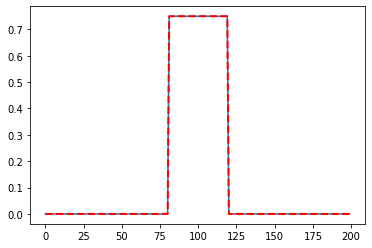

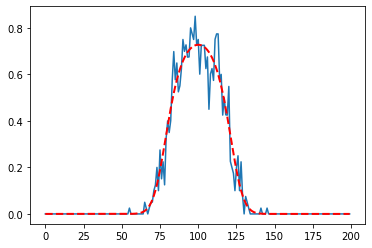

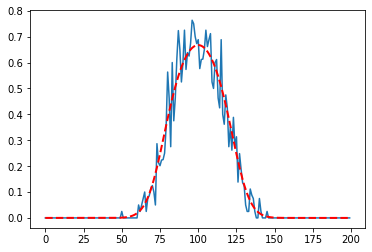

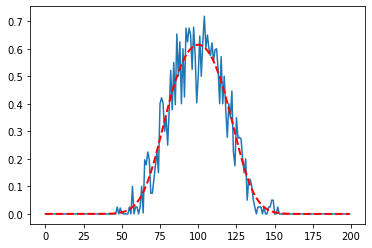

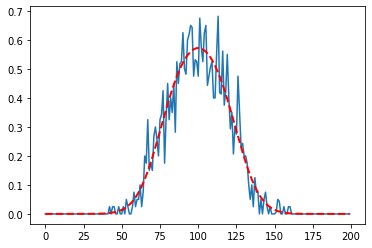

In [6]:
Pp = 0.0
Pm = 0.5
Ppull = 0.5

C_out ,t_out, x_out, plot_list = cell_interaction_ABM((Pm, Ppull),
                                                      migration_rules = migration_step_pulling,
                                                      T_end=1000.0)
C = C_out
t = t_out
x = x_out

## Mean-field model
q = [Pm/4,Ppull]
IC = C[:,0]
sol = odeint(Diffusion_eqn, IC, t, args=(x, q, simple_pulling_diffusion))
sol = sol.T    

for i in np.arange(0,100,20):

    plt.figure()
    plt.plot(x, C[:,i])
    plt.plot(x, sol[:,i],"r--",linewidth=2)